In [1]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt

# Task 1

In [2]:
def rbf_kernel(x1, x2, scale):
    """
    The radial basis function kernel is used to calculate the similarity between two data points x1 and x2.
    scale: a hyperparameter that controls the width of the kernel
    """
    return exp(-1 * (np.linalg.norm(x1-x2) ** 2) / (2*scale**2))

def cov_matrix(x, scale):
    """
    The covariance matrix is created by pairwise evaluation of the kernel function on the input data points.
    """
    return np.array([[rbf_kernel(x1,x2, scale) for x2 in x] for x1 in x])

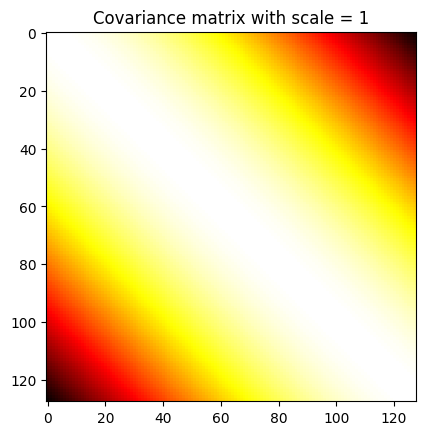

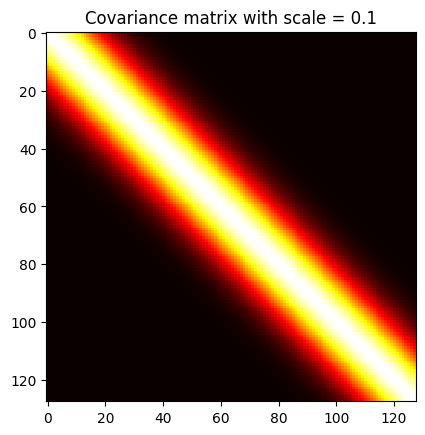

In [3]:
X = np.linspace(0, 1, 128)

sigma = cov_matrix(X, 1)

plt.imshow(sigma, cmap='hot', interpolation='nearest')
plt.title('Covariance matrix with scale = 1')
plt.show()

sigma = cov_matrix(X, 0.1)

plt.imshow(sigma, cmap='hot', interpolation='nearest')
plt.title('Covariance matrix with scale = 0.1')
plt.show()

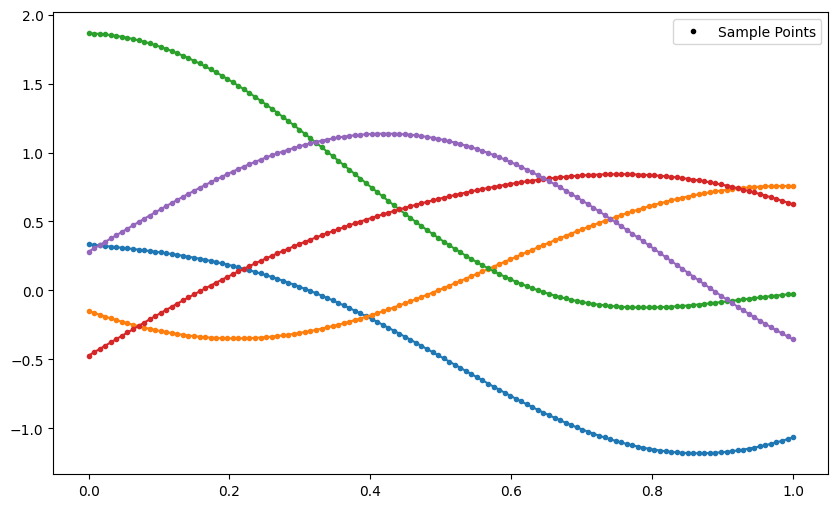

In [5]:
def sample_functions(X, scale, number_of_functions=1):
    """
    Sample functions from the prior distribution
    """
    sigma = cov_matrix(X, scale)
    # Assume a mean of 0 for simplicity
    mean = np.zeros(X.shape[0])
    ys = np.random.multivariate_normal(
        mean=mean, cov=sigma, 
        size=number_of_functions)
    
    return ys

ys = sample_functions(X, 0.5, 5)

plt.figure(figsize=(10,6))
plt.plot(X, ys.T, marker='.')
plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.legend()
plt.show()

[0.36977091 0.2651144  0.21865179 0.47516634 0.29245809]


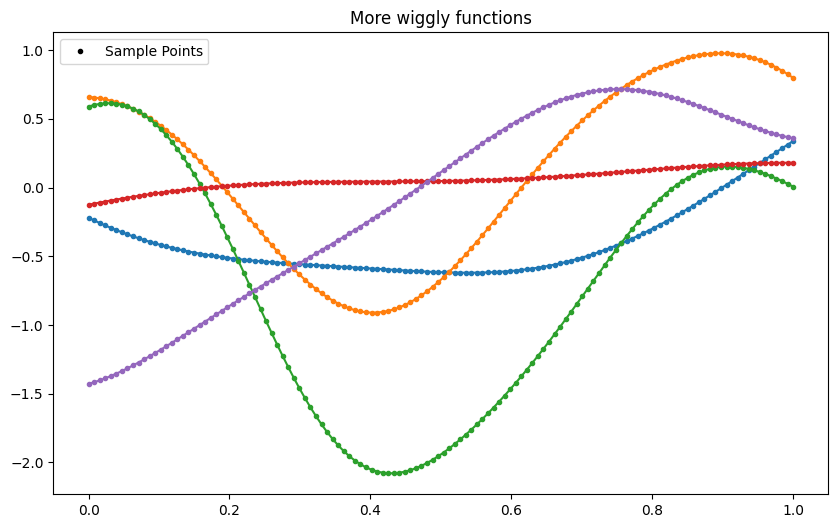

[0.54912365 0.50590792 0.35912698 0.77286318 0.42809957]


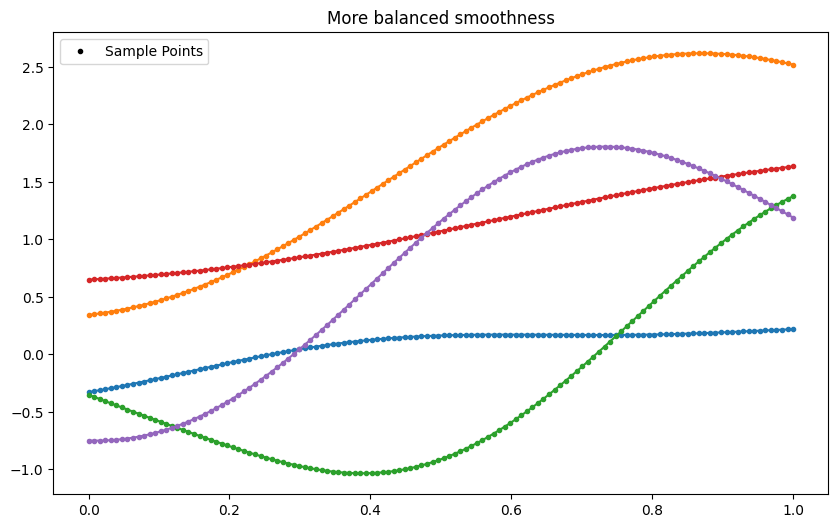

[0.72259766 0.72453517 0.83305817 0.70923848 0.91412057]


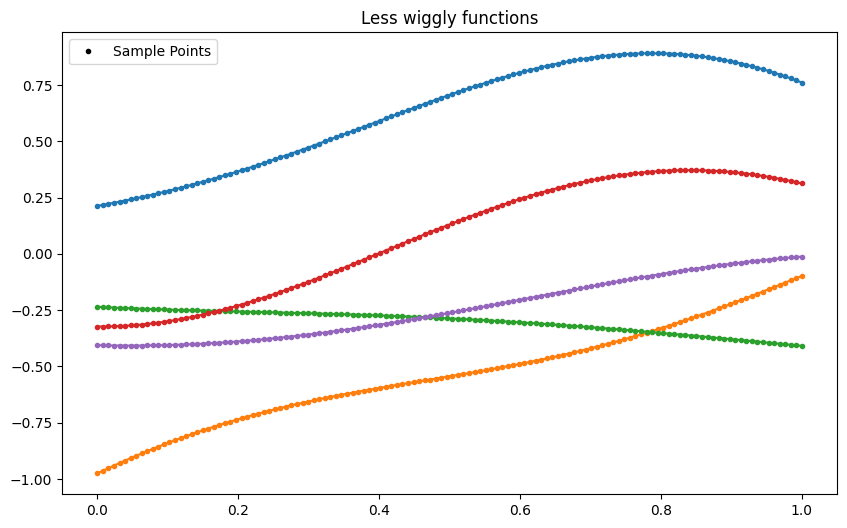

In [6]:
" Sampling from Beta distribution "

rng = np.random.default_rng()
# more wiggly functions
sample = rng.beta(a=2, b=5, size=5)
print(sample)
ys = [sample_functions(X, scale=s) for s in sample]

plt.figure(figsize=(10,6))
[plt.plot(X, y.T, marker='.') for y in ys]
plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.title('More wiggly functions')
plt.legend()
plt.show()

# more balanced smoothness
sample = rng.beta(a=3, b=3, size=5)
print(sample)
ys = [sample_functions(X, scale=s) for s in sample]

plt.figure(figsize=(10,6))
[plt.plot(X, y.T, marker='.') for y in ys]
plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.title('More balanced smoothness')
plt.legend()
plt.show()
# less wiggly functions
sample = rng.beta(a=5, b=2, size=5)
print(sample)
ys = [sample_functions(X, scale=s) for s in sample]

plt.figure(figsize=(10,6))
[plt.plot(X, y.T, marker='.') for y in ys]
plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.title('Less wiggly functions')
plt.legend()
plt.show()

### Answer to general question 3

The variablilty of the training set is important in zero-shot, because we want the model to learn from as much different data as possible to cover everything, since we can not fine tune it later it has to work out of the box on unseen data.

# Task 2

In [7]:
def generate_bitmask_irregular(size=128, min_ones=10, max_ones=128):
    """
    Generate a random bitmask of 0s and 1s with a fixed min and max number of 1s.
    """
    # Determine the number of 1s (between min_ones and max_ones)
    num_ones = np.random.randint(min_ones, max_ones + 1)
    
    # Initialize a mask of zeros
    bitmask = np.zeros(size, dtype=int)
    
    # Choose unique random indices to set to 1
    ones_indices = np.random.choice(size, num_ones, replace=False)
    
    # Set these indices to 1
    bitmask[ones_indices] = 1
    
    return bitmask

bitmask= generate_bitmask_irregular(min_ones=64)
bitmask

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[0.89825751 0.48397963 0.40425457 0.82015464 0.38620934]


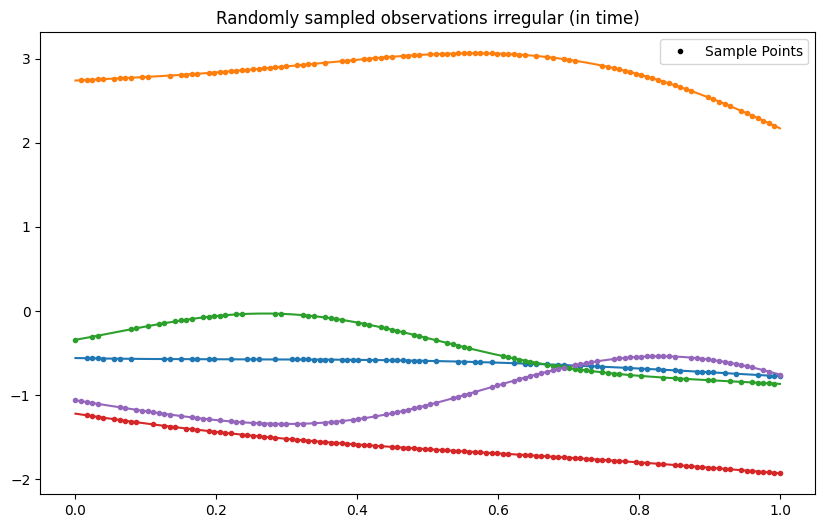

[0.72311694 0.77674348 0.88840169 0.62827448 0.95170273]


In [8]:
# more balanced smoothness
sample = rng.beta(a=3, b=3, size=5)
print(sample)
sampled_points, bitmasks, ys = list(), list(), list()

for s in sample:
    # Generate a random bitmask
    bitmask = generate_bitmask_irregular(min_ones=64)
    bitmasks.append(bitmask)
    # Sample the points from the bitmask
    sampled_points.append(X[bitmask == 1])

    y = sample_functions(X, scale=s)
    ys.append(y)

plt.figure(figsize=(10,6))

lines = [plt.plot(X, y.T) for y in ys]
for i in range(len(sampled_points)):
    plt.plot(sampled_points[i], ys[i].T[bitmasks[i] == 1], marker='.', color=lines[i][0].get_color(), linestyle='None')

plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.title('Randomly sampled observations irregular (in time)')
plt.legend()
plt.show()
# less wiggly functions
sample = rng.beta(a=5, b=2, size=5)
print(sample)
ys = [sample_functions(X, scale=s) for s in sample]

In [9]:
def generate_bitmask_regular(X, min_ones=10, max_ones=128):
    """
    Generate a bitmask for regularly sampled points.
    """
    # Determine the number of 1s (between min_ones and max_ones)
    num_ones = np.random.randint(min_ones, max_ones + 1)

    # Regularly sample points from X
    indices = np.linspace(0, len(X) - 1, num_ones, dtype=int)
    sampled_points = X[indices]

    bitmask = np.zeros(len(X), dtype=int)
    # Set mask entries to 1 where points in sampled_points are found in X
    indices = np.isin(X, sampled_points)
    bitmask[indices] = 1

    return bitmask, sampled_points

bitmask,_ = generate_bitmask_regular(X)
bitmask

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

[0.64026225 0.17542372 0.20660833 0.19525721 0.92765504]


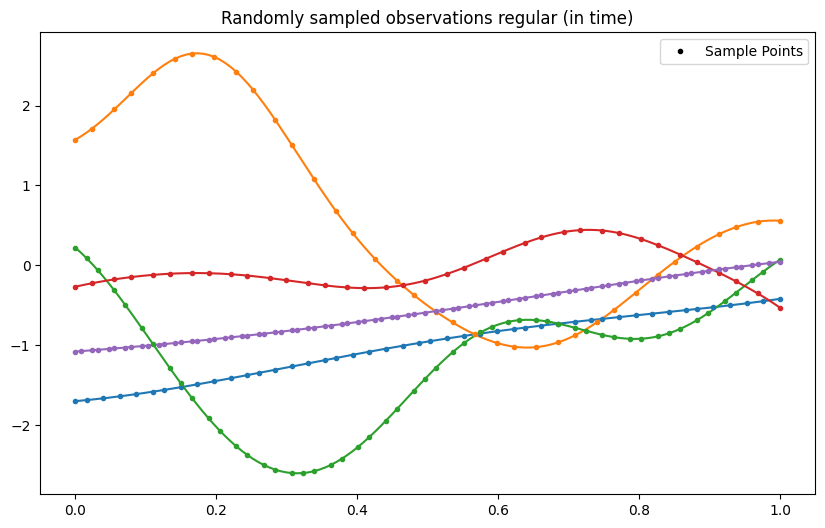

In [24]:
# more balanced smoothness
sample = rng.beta(a=3, b=3, size=5)
print(sample)
sampled_points, bitmasks, ys = list(), list(), list()

for s in sample:
    # Generate a random bitmask
    bitmask, observations = generate_bitmask_regular(X, min_ones=32)
    bitmasks.append(bitmask)
    # Sample the points from the bitmask
    sampled_points.append(observations)

    y = sample_functions(X, scale=s)
    ys.append(y)

plt.figure(figsize=(10,6))

lines = [plt.plot(X, y.T) for y in ys]
for i in range(len(sampled_points)):
    plt.plot(sampled_points[i], ys[i].T[bitmasks[i] == 1], marker='.', color=lines[i][0].get_color(), linestyle='None')

plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.title('Randomly sampled observations regular (in time)')
plt.legend()
plt.show()

# Task 3

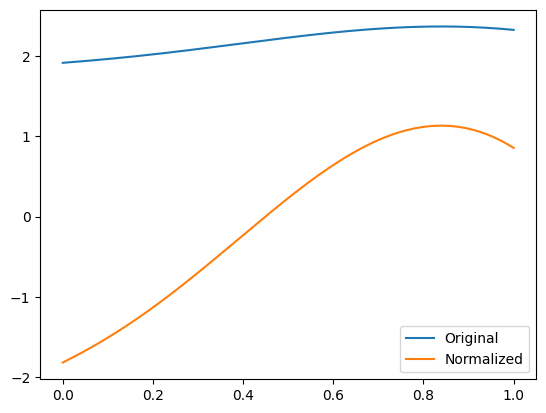

In [ ]:
def instance_normalize(y_values, epsilon=1e-8):
    """
    Normalize the values of y_values to have a mean of 0 and a variance of 1.
    """
    # Calculate mean and variance
    mean_y = np.mean(y_values)
    var_y = np.var(y_values)
    
    # Normalize each value in y_values
    y_normalized = (y_values - mean_y) / np.sqrt(var_y + epsilon)
    return y_normalized

y = sample_functions(X, scale=s)
y_normalized = instance_normalize(y[0])

plt.plot(X, y[0], label='Original')
plt.plot(X, y_normalized, label='Normalized')
plt.legend()
plt.show()

[0.46368072 0.21490545 0.86706445 0.57016481 0.78191218]


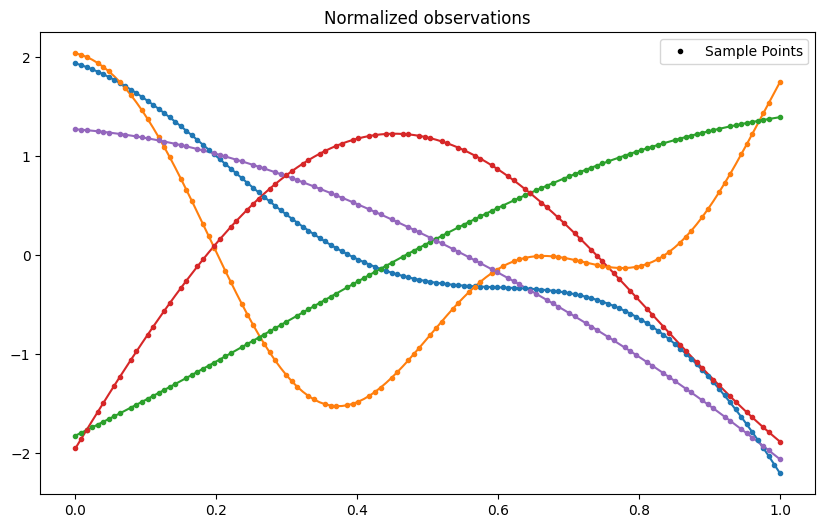

In [ ]:
# more balanced smoothness
sample = rng.beta(a=3, b=3, size=5)
print(sample)
sampled_points, bitmasks, ys = list(), list(), list()

for s in sample:
    # Generate a random bitmask
    bitmask, observations = generate_bitmask_regular(X, min_ones=32)
    bitmasks.append(bitmask)
    # Sample the points from the bitmask
    sampled_points.append(observations)

    y = sample_functions(X, scale=s)
    # Normalize the observations
    y_normalized = instance_normalize(y[0])
    ys.append(y_normalized)

plt.figure(figsize=(10,6))

lines = [plt.plot(X, y.T) for y in ys]
for i in range(len(sampled_points)):
    plt.plot(sampled_points[i], ys[i].T[bitmasks[i] == 1], marker='.', color=lines[i][0].get_color(), linestyle='None')

plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.title('Normalized observations')
plt.legend()
plt.show()

# Task 4

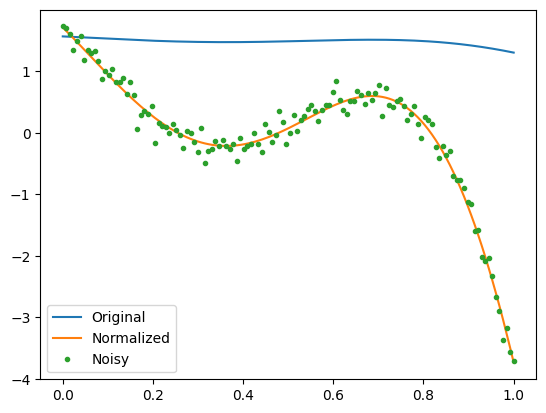

In [ ]:
def add_gaussian_noise(y_values, noise_mean=0, noise_std_dev=0.1):
    """
    Add Gaussian noise to the y_values.
    """
    # Step 1: Sample noise standard deviation for this function
    rng = np.random.default_rng()
    noise_std = abs(rng.normal(loc=noise_mean, scale=noise_std_dev))
    
    # Step 2: Generate Gaussian noise with the sampled standard deviation
    noise = rng.normal(loc=0, scale=noise_std, size=y_values.shape)
    
    # Step 3: Add the noise to the function values
    y_noisy = y_values + noise
    return y_noisy

y = sample_functions(X, scale=s)
y_normalized = instance_normalize(y[0])
y_noisy = add_gaussian_noise(y_normalized)

plt.plot(X, y[0], label='Original')
plt.plot(X, y_normalized, label='Normalized')
plt.plot(X, y_noisy, marker='.', label='Noisy', linestyle='None')
plt.legend()
plt.show()

[0.6985957  0.50447454 0.64736234 0.39479754 0.66213922]


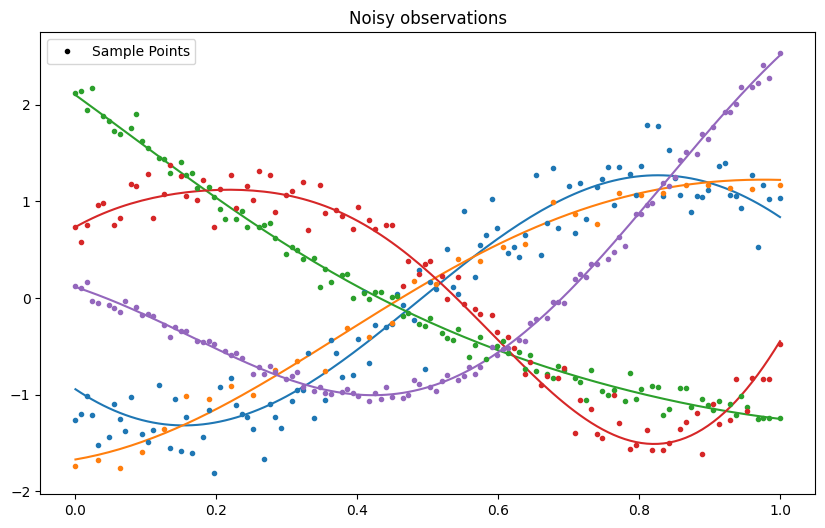

In [34]:
# more balanced smoothness
sample = rng.beta(a=3, b=3, size=5)
print(sample)
sampled_points, bitmasks, ys, ys_noisy = list(), list(), list(), list()

for s in sample:
    # Generate a random bitmask
    bitmask, observations = generate_bitmask_regular(X, min_ones=32)
    bitmasks.append(bitmask)
    # Sample the points from the bitmask
    sampled_points.append(observations)

    y = sample_functions(X, scale=s)
    # Normalize the observations
    y_normalized = instance_normalize(y[0])
    ys.append(y_normalized)

    # Add noise to the observations
    y_noisy = add_gaussian_noise(y_normalized)
    ys_noisy.append(y_noisy)

plt.figure(figsize=(10,6))

lines = [plt.plot(X, y.T) for y in ys]
for i in range(len(sampled_points)):
    plt.plot(sampled_points[i], ys_noisy[i].T[bitmasks[i] == 1], marker='.', color=lines[i][0].get_color(), linestyle='None')

plt.plot([], [], marker='.', color='black', linestyle='None', label='Sample Points')
plt.title('Noisy observations')
plt.legend()
plt.show()